<a href="https://colab.research.google.com/github/tazwar70/Carbon-Emission/blob/main/Carbon_Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Carbon Emission

This notebook looks through a dataset of car models and predicts its carbon emission.

Here, predictions are made using Linear Regression and Polynomial Regression to find out which is a better model to find out which is better for this scenario.

# Initialize

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tazwar70/Databases/main/FuelConsumptionCo2.csv')
df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


# Cleaning the Data

Since not all of the information is needed, the following parameters will be used for the model.

In [ ]:
data = df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
data.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6


# Data Overview

In [ ]:
px.scatter(data,
    x = "ENGINESIZE",
    y = "CO2EMISSIONS",
    color = "CYLINDERS",
    size = "FUELCONSUMPTION_COMB",
    title = "Carbon Emissions Overview"
    )

Based on the figure above, there is a linear relationship between the Engine Size and the Carbon Emission.

# Linear Regression

Ininially comparing the variables and their linearity.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [ ]:
engine_size = data.ENGINESIZE
emissions = data.CO2EMISSIONS
cylinders = data.CYLINDERS
fuel_consumption = data.FUELCONSUMPTION_COMB

Text(0.5, 1.0, 'Engine Size vs Emissions')

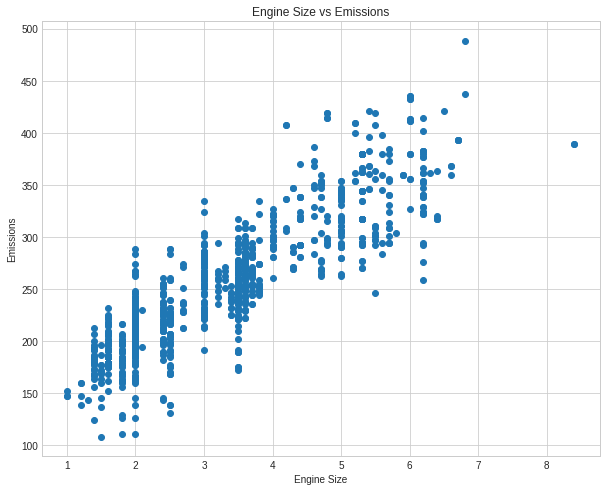

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.style.use('seaborn-whitegrid')
plt.scatter(engine_size,emissions)
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.title('Engine Size vs Emissions')

Text(0.5, 1.0, 'Cylinders vs Emissions')

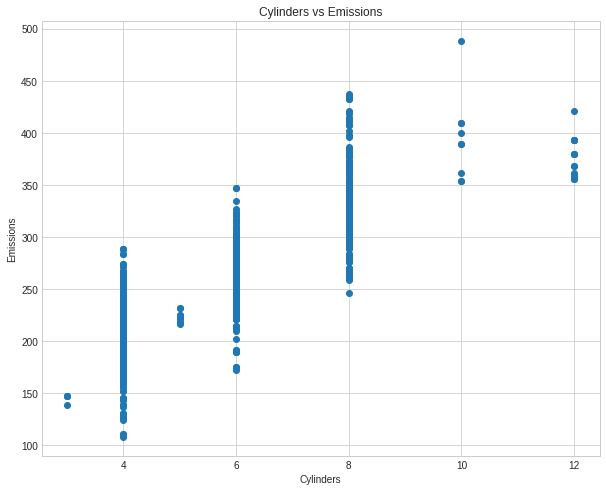

In [ ]:
plt.scatter(cylinders,emissions)
plt.xlabel('Cylinders')
plt.ylabel('Emissions')
plt.title('Cylinders vs Emissions')

Text(0.5, 1.0, 'Fuel Consumption vs Emissions')

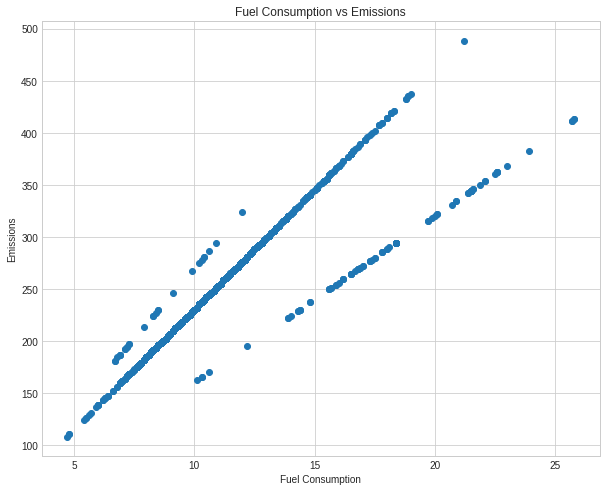

In [ ]:
plt.scatter(fuel_consumption,emissions)
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')
plt.title('Fuel Consumption vs Emissions')

Based on the three plots above, the Engine Size vs the Emission plot shows the best linearity and therefore, this will be used for the linear regression model.

## The model

In [ ]:
# Test-Train Split
ratio = 0.6
n = np.random.rand(len(data)) < ratio
train = data[n]
test = data[~n]

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (train_x, train_y)

# The coefficients
print (f'Slope: {(regr.coef_[0][0]):.2f}')
print (f'Intercept: {(regr.intercept_[0]):.2f}')

Slope: 38.78
Intercept: 125.94


## The Relationship

Text(0.5, 1.0, 'Engine Size vs Emissions')

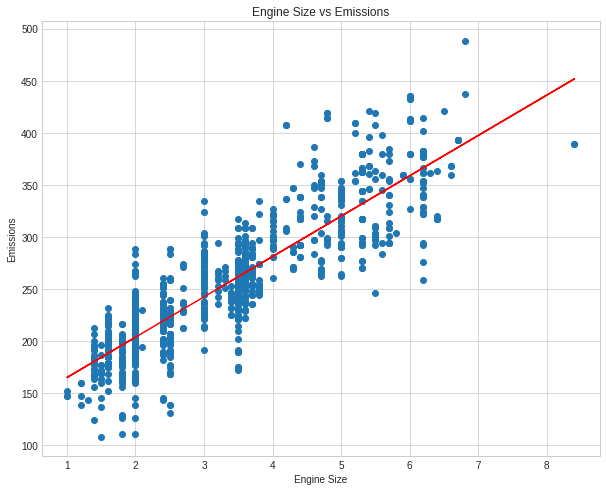

In [ ]:
plt.scatter(engine_size,emissions)
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.title('Engine Size vs Emissions')

## Accuracy

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

MAE = np.mean(np.absolute(test_y_ - test_y))
MSE = np.mean((test_y_ - test_y) ** 2)
R2_score = r2_score(test_y_ , test_y)

print(f'Mean absolute error: {MAE}')
print(f'Residual sum of squares (MSE): {MSE}')
print(f'R2-score: {R2_score}')

Mean absolute error: 23.553429875580402
Residual sum of squares (MSE): 966.5616204720866
R2-score: 0.6701086071766199


# Using Tensorflow to Generate an equation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

The Model

In [ ]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [ ]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('CO2EMISSIONS')
test_labels = test_features.pop('CO2EMISSIONS')

In [ ]:
train_data.describe().transpose()[['mean', 'std']]

,mean,std
ENGINESIZE,3.383255,1.431971
CYLINDERS,5.834895,1.827150
CO2EMISSIONS,256.615925,63.420460
FUELCONSUMPTION_COMB,11.634543,3.500543


In [ ]:
normalizer = preprocessing.Normalization()

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
first = np.array(train_features[:1])

In [ ]:
ENGINESIZE = np.array(train_features['ENGINESIZE'])

ENGINESIZE_normalizer = preprocessing.Normalization(input_shape=[1,])
ENGINESIZE_normalizer.adapt(ENGINESIZE)

In [ ]:
ENGINESIZE_model = tf.keras.Sequential([
    ENGINESIZE_normalizer,
    layers.Dense(units=1)
])

ENGINESIZE_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
ENGINESIZE_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.3),
    loss='mean_absolute_error')

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss')
history = ENGINESIZE_model.fit(
    train_features['ENGINESIZE'], train_labels,
    epochs=100,
    # Callback to stop training
    callbacks = es,
    # Calculate validation results on 20% of the training data
    validation_split = 0.25)

Epoch 1/100
20/20 [==============================] - 1s 27ms/step - loss: 256.0369 - val_loss: 248.8271
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 249.8974 - val_loss: 242.8511
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 243.0678 - val_loss: 236.8556
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 239.5776 - val_loss: 230.8735
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 235.6748 - val_loss: 224.9058
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 227.8505 - val_loss: 218.8978
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 218.3764 - val_loss: 212.8989
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 209.9249 - val_loss: 206.8925
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 208.0553 - val_loss: 200.9294
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
49,23.771938,22.689049,49
50,23.729427,22.643982,50
51,23.683304,22.607210,51
52,23.664923,22.574762,52
53,23.680094,22.584387,53


Text(0, 0.5, 'CO_2 Emission')

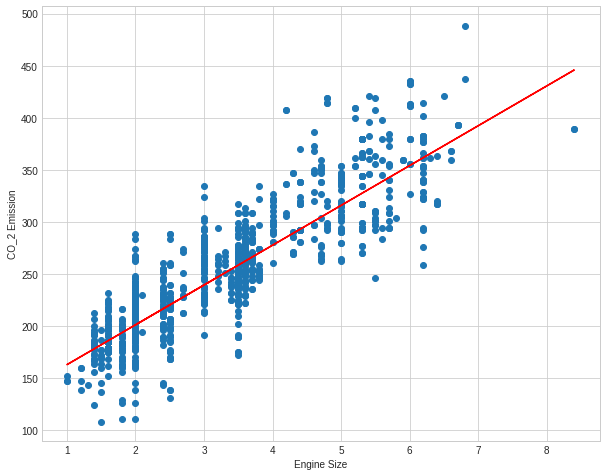

In [ ]:
emissions_pred = ENGINESIZE_model.predict(data.ENGINESIZE)
plt.scatter(data.ENGINESIZE,data.CO2EMISSIONS)
plt.plot(data.ENGINESIZE,emissions_pred,'-r')
plt.xlabel('Engine Size')
plt.ylabel('CO_2 Emission')

In [ ]:
x1 = float(data.ENGINESIZE[1])
x2 = float(data.ENGINESIZE[2])

y1 = emissions_pred[1]
y2 = emissions_pred[2]

m = (y2 - y1) / (x2 - x1)
c = y1 - m * x1

print(f'Slope: {(m[0]):.2f}')
print(f'Intercept: {(c[0]):.2f}')

Slope: 38.28
Intercept: 124.39


## Using Scikit Learn,

Coefficients: 38.41

Intercept: 126.97

## Using TensorFlow,

Slope: 37.78

Intercept: 126.07

# Polynomial Regression

Taking a look between Fuel Consumption vs Emissions and Cylinders vs Emissions.

## Fuel Consumption vs Emissions

In [ ]:
px.scatter(data,
           data.FUELCONSUMPTION_COMB,
           data.CO2EMISSIONS,
           size=data.ENGINESIZE,
           color=data.ENGINESIZE,
           title="CO_2 Emission vs Fuel Consumption")

## Cylinders vs Emissions

In [ ]:
px.scatter(data,
           data.CYLINDERS,
           data.CO2EMISSIONS,
           size=data.FUELCONSUMPTION_COMB,
           color=data.ENGINESIZE,
           title="CO_2 Emission vs Cylinders")

Based on the two plots, it can be seen that the Enginesize is the root cause to the $CO_2$ emissions.

## Fuel Consumption vs Engine Size

In [ ]:
px.scatter(data,
           data.ENGINESIZE,
           data.FUELCONSUMPTION_COMB,
           color=data.CYLINDERS,
           size=data.CYLINDERS,
           title="Fuel Consumption vs Engine Size")